# Tutorial 4 - Propagation of acoustic wave

## The problem

Imagine we have 2 sources continuously emitting acoustic signal, $S_1$ and $S_2$ in the figure. A Physicist is doing tests on this two machines. What he has in hand is a device that can detects the acoustic wave pressure at its location. At first, he stands at point A, turns on $S_1$ and turns off $S_2$, the machine gives the output **'signal1.csv'**. He then turns off  $S_1$ and turns on $S_2$, this time the machine gives output **'signal2.csv'**.

<img src="figure.png" width=450> <p>
<a id='fig1'><center> Figure 1.1 </center></a>

**The goals of this tutorial is: **
1. Find out what signal will be detected if the Physicist turns on both machine while standing at A? What is the intensity of the intensity level of the sound?

2. What is the result of question 1 if he moves from point A to point B.

## Import and preprocess the data

First we need to import the data and get some initial information from it

In [26]:
# Import the library
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   # This library is for importing and managing data

# Importing the data
S1 = pd.read_csv('signal1.csv')
S2 = pd.read_csv('signal2.csv')

print(S1.head())
print(S2.head())

     t (s)    P (Pa)
0  0.00000  0.052010
1  0.00005  0.037291
2  0.00010  0.022969
3  0.00015  0.039934
4  0.00020  0.033253
     t (s)    P (Pa)
0  0.00000  0.006015
1  0.00005  0.003472
2  0.00010 -0.005888
3  0.00015  0.019229
4  0.00020 -0.007885


So the unit in time is second, and pressure is Pascal. Now as mentioned in the previous tutorials, once you get a signal, the first things you should do is to find out the sampling rate, see how the signal looks like and plot its spectrogram.

### Question 1

Look at the time interval between two signal, determine the sampling rate of the detector.

Good! Now let's plot the signal versus time.

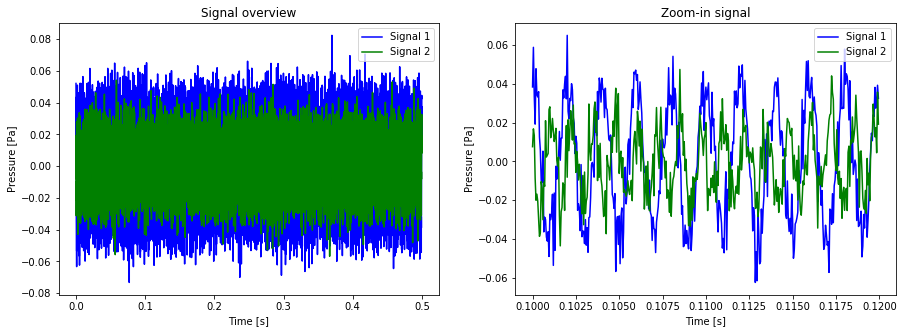

In [27]:
# Extract the data features from the signal
time1 = S1.iloc[:,0].values
signal1 = S1.iloc[:,1].values
time2 = S2.iloc[:,0].values
signal2 = S2.iloc[:,1].values
Fs = 1/(time1[1]-time1[0]) # Signal frequency

# Plot the signal
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
plt.plot(time1, signal1, color='blue', label='Signal 1')
plt.plot(time2, signal2, color='green', label='Signal 2')
plt.xlabel('Time [s]')
plt.ylabel('Pressure [Pa]')
plt.title('Signal overview')
plt.legend(loc=1)

# Plot the zoom-in signal
time_start, time_end = 0.1, 0.1+0.02
i_start, i_end = int(time_start*Fs), int(time_end*Fs)
ax2 = fig.add_subplot(122)
plt.plot(time1[i_start:i_end], signal1[i_start:i_end], color='blue', label='Signal 1')
plt.plot(time2[i_start:i_end], signal2[i_start:i_end], color='green', label='Signal 2')
plt.xlabel('Time [s]')
plt.ylabel('Pressure [Pa]')
plt.title('Zoom-in signal')
plt.legend(loc=1)

The signal looks like a sinuisoidal signal, with lots of noise. Now let's plot the spectrogram. By practicing the code in previous tutorials, you should be able to do it yourself by now, but let's do it together one more time

Text(0,0.5,'Frequency [Hz]')

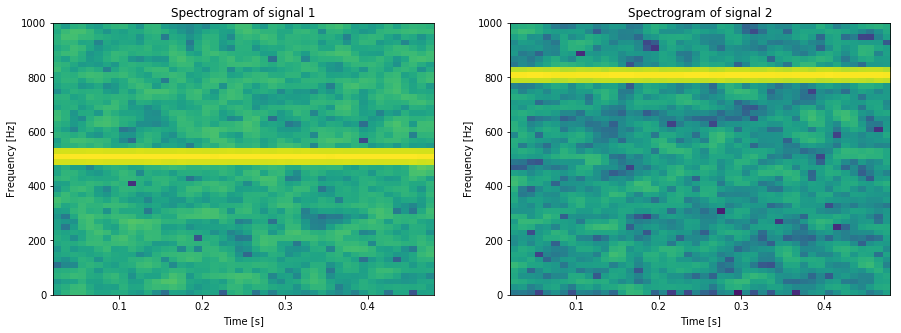

In [28]:
NFFT = int(len(signal1)/10)
noverlap = 0.8*NFFT

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
plt.specgram(signal1, Fs=Fs, NFFT=NFFT, noverlap=noverlap)
plt.ylim(0,1000)
plt.title('Spectrogram of signal 1')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')

ax2 = fig.add_subplot(122)
plt.specgram(signal2, Fs=Fs, NFFT=NFFT, noverlap=noverlap)
plt.ylim(0,1000)
plt.title('Spectrogram of signal 2')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')

### Question 2:

Do you realize that I have to modify the data windows NFFT? Try with the default NFFT and other values to find out why

## Answer the first question

Now after the first analysis, we know that the device has the sampling rate of 20,000 kHz, both signal 1 and signal 2 has stable frequency with the former being around 500 Hz and the later around 800 kHz. The first question is **_"what signal will be detected if the Physicist turns on both machine while standing at A?"_**

To answer this, remember that wave can be superpositioned. That is, the results of having multiple wave will be the sum of their wave functions. With this we can calculate the signal detected by the device when both $S_1$ and $S_2$ are turned on.

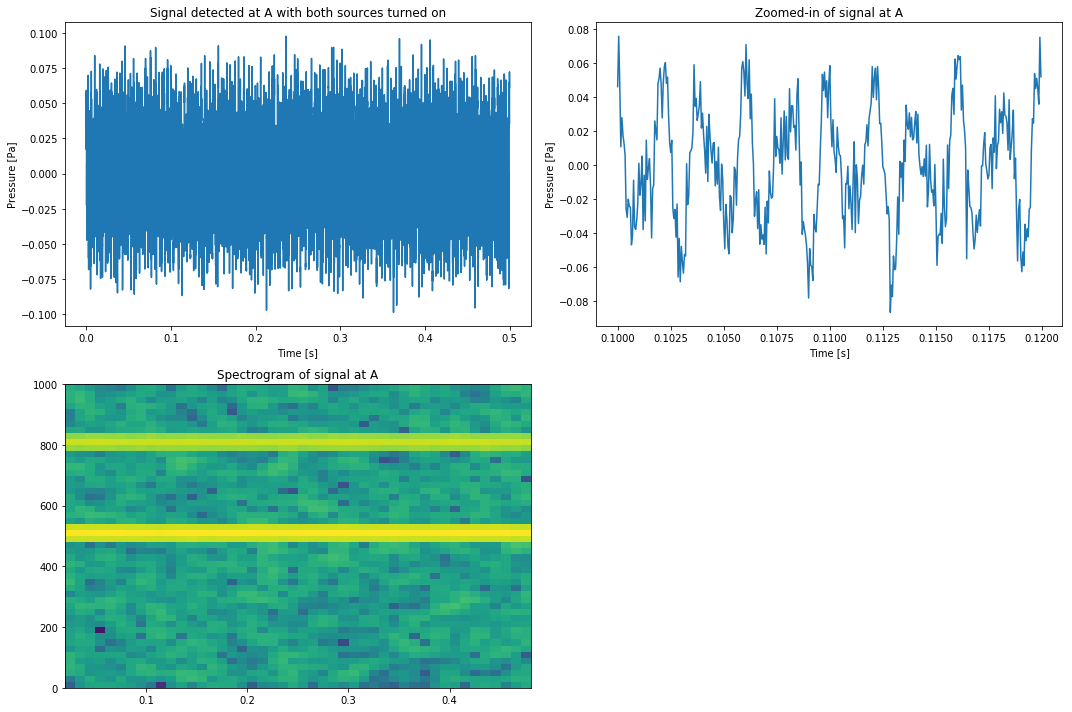

In [29]:
signalA = signal1 + signal2

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
plt.plot(time1, signalA)
plt.title('Signal detected at A with both sources turned on')
plt.xlabel('Time [s]')
plt.ylabel('Pressure [Pa]')

ax2 = fig.add_subplot(222)
time_start, time_end = 0.1, 0.1+0.02
i_start, i_end = int(time_start*Fs), int(time_end*Fs)
plt.plot(time1[i_start:i_end], signalA[i_start:i_end])
plt.title('Zoomed-in of signal at A')
plt.xlabel('Time [s]')
plt.ylabel('Pressure [Pa]')

ax2 = fig.add_subplot(223)
NFFT = int(len(signal1)/10)
noverlap = 0.8*NFFT
plt.specgram(signalA, Fs=Fs, NFFT=NFFT, noverlap=noverlap)
plt.ylim(0,1000)
plt.title('Spectrogram of signal at A')
plt.tight_layout()

It can be seen from the spectrogram that the combined signal still preserve the frequency of its components. Now we move onto the next part, which is finding the level of loudness heardt by the Physicist at A.

Combining equation (3.12) and (3.13) in the lecture 3, we have:

\begin{equation}
I = \frac{\frac{1}{T}\int_0^T p^2(t) dt}{\rho_0 c} \tag{1}
\end{equation}
where the density of air $\rho_0$ is 1.225 kg/m$^3$ and sound velocity in air $c$ is 343 m/s. The numerator in equation (1) is the mean square of acoustic pressure. With discrete data, this can be approximated as:

\begin{equation}
\frac{1}{T}\int_0^T p^2(t) dt \approx \frac{1}{T} \sum_{t=0}^{T} p^2(t)dt \tag{2}
\end{equation}

where $p(t)$ is the pressure at A that we just calculated. This signal consists of two different signals with different frequency, so the value of $T$ in equation (2) is not neccesary the wave period, but rather a large enough interval to have a good estimate of the average value of the pressure.

Average intensity level at A: 64.512414 dB


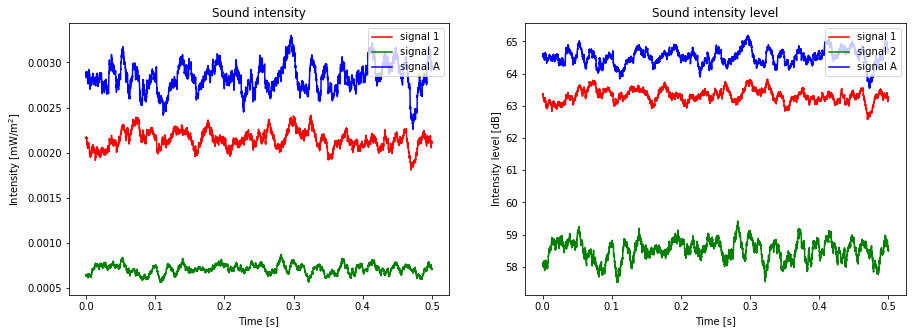

In [37]:
# This function find the mean squared of the data
def find_intensity(data, Fs, time_interval):
    d_window = int(time_interval*Fs)
    n = len(data) - d_window
    mean_square = np.zeros(n)
    for i in range(0,n):
        data_window = data[i:i+d_window]
        ms = np.mean(data_window**2)
        mean_square[i] = ms
    time_plot = np.linspace(0, len(data)/Fs, n)
    return time_plot, mean_square

rho = 1.225  # Air density
c = 343.  # sound velocity in air
time_interval = 10e-3   # width of the time windows
I_ref = 1e-12

time_plot1, mean_square1 = find_intensity(signal1, Fs, 10e-3)
I1 = 1/(rho*c)*mean_square1
I_level1 = 10*np.log10(I1/I_ref)

time_plot2, mean_square2 = find_intensity(signal2, Fs, 10e-3)
I2 = 1/(rho*c)*mean_square2
I_level2 = 10*np.log10(I2/I_ref)

time_plotA, mean_squareA = find_intensity(signalA, Fs, 10e-3)
IA = 1/(rho*c)*mean_squareA
I_levelA = 10*np.log10(IA/I_ref)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
plt.plot(time_plot1, I1*1000, color='red', label='signal 1')
plt.plot(time_plot2, I2*1000, color='green', label = 'signal 2')
plt.plot(time_plotA, IA*1000, color='blue', label = 'signal A')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [mW/m$^2$]')
plt.legend(loc = 1)
plt.title('Sound intensity')

ax2 = fig.add_subplot(122)
plt.plot(time_plot1, I_level1, color='red', label='signal 1')
plt.plot(time_plot2, I_level2, color='green', label = 'signal 2')
plt.plot(time_plotA, I_levelA, color='blue', label = 'signal A')
plt.xlabel('Time [s]')
plt.ylabel('Intensity level [dB]')
plt.legend(loc = 1)
plt.title('Sound intensity level')

print('Average intensity level at A: %f dB' %(np.mean(I_levelA)))

So now that we have answered part 1, it is your turn to solve for part 2. Let's do it step by step by answering these questions:

### Question 3

What is the individual signal from $S_1$ and $S_2$ that the device is going to detect if it is put at $A$ and $B$? Think about amplitude, which depends on distance from souce, and phase, which, whether or not important?

In [38]:
## Your code here

### Question 4

Add the two individuals signal to find out the combined signal if both devices are turned on. Try plotting the spectrogram and investigate its frequency

In [39]:
## Your code here

### Question 5

Find out the intensity and intensity level of the combined signal. What do you see in the result compared to the result at $A$

In [ ]:
## Your code here